<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/TS/%D0%A2%D0%B5%D0%BC%D0%B0%203.%20%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20%D0%B2%D0%B8%D0%B4%D0%B0%20ARIMA/Lecture_3_0_%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D1%81%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B5%D0%B3%D0%BE_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B3%D0%BE_(MA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Модель скользящего среднего (MA)

### 1. **Что такое модель MA?**
Модель скользящего среднего (Moving Average, MA) — это модель временных рядов, в которой текущее значение ряда $X_t$ представлено как комбинация случайных ошибок (шумов) из текущего и нескольких предыдущих периодов.

MA используется для моделирования временных рядов с ограниченной "памятью", где прошлые ошибки объясняют текущие значения, но эта зависимость не простирается далеко в прошлое.



### 2. **Формула MA(q):**
Модель MA порядка $q$ задается следующим уравнением:

$$
X_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q},
$$

где:
- $X_t$ — значение временного ряда в момент времени $t$,
- $\mu$ — среднее значение временного ряда (если ряд стационарный и центрирован, то $\mu = 0$),
- $\varepsilon_t$ — случайная ошибка (шум) в момент времени $t$, $\varepsilon_t \sim N(0, \sigma^2)$,
- $\theta_1, \theta_2, \dots, \theta_q$ — параметры модели (веса ошибок),
- $q$ — порядок модели, то есть количество предыдущих ошибок, которые учитываются.

#### **Пример: Модель MA(1):**
$$
X_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1}.
$$

Текущее значение $X_t$ определяется текущей ошибкой $\varepsilon_t$ и предыдущей ошибкой $\varepsilon_{t-1}$, взвешенной коэффициентом $\theta_1$.



### 3. **Особенности модели MA:**
1. **Природа зависимости:**
   - В MA текущие значения зависят от случайных ошибок из прошлого, а не от самих значений ряда (как в AR — авторегрессионной модели).

2. **Стационарность:**
   - Модель MA **всегда стационарна**, так как зависимость ограничена конечным числом прошлых ошибок.

3. **Автокорреляция:**
   - Автокорреляционная функция (ACF) модели MA обрывается на $q$-м лаге. Это означает, что автокорреляция присутствует только для лагов до $q$, а дальше она равна нулю.



### 4. **Как выбрать порядок $q$?**

#### **Метод 1: Анализ ACF**
1. Постройте график автокорреляционной функции (ACF).
   - Это можно сделать с помощью библиотек Python (`statsmodels`) или R.
   - ACF показывает корреляцию между текущими и прошлыми значениями временного ряда на разных лагах.
2. Найдите последний лаг, на котором автокорреляция значима (выходит за доверительный интервал).
3. Значимый лаг указывает на порядок $q$ модели MA.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Генерация примера данных MA(1)
np.random.seed(42)
n = 100
epsilon = np.random.normal(0, 1, n)
theta = 0.8
X = np.zeros(n)

for t in range(1, n):
    X[t] = epsilon[t] + theta * epsilon[t-1]

# Функция для подбора порядка q с использованием AIC
def select_best_q_by_aic(data, max_q=10):
    best_q = None
    best_aic = float('inf')

    # Перебор значений q
    for q in range(0, max_q + 1):
        try:
            # Строим модель MA(q)
            model = ARIMA(data, order=(0, 0, q))  # order=(p, d, q), где p=0 и d=0 для модели MA
            result = model.fit()  # Оценка модели
            # Если AIC текущей модели меньше, обновляем лучший порядок
            if result.aic < best_aic:
                best_aic = result.aic
                best_q = q
        except:
            continue

    return best_q, best_aic

# Поиск лучшего порядка q с минимальным AIC
optimal_q, optimal_aic = select_best_q_by_aic(X, max_q=10)

print(f"Оптимальный порядок q: {optimal_q}, с минимальным AIC: {optimal_aic}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Оптимальный порядок q: 1, с минимальным AIC: 269.32161318124207




Рассмотрим конкретного числового примера.


### Исходные данные: временной ряд

Предположим, у нас есть временной ряд ($Y_t$) с наблюдаемыми значениями за 5 периодов:

| **Период (t)** | **Значение ($Y_t$)** |
|-||
| 1              | 10                     |
| 2              | 12                     |
| 3              | 11                     |
| 4              | 13                     |
| 5              | 15                     |

Наша цель:
1. Построить модель MA(2), которая учитывает ошибки двух предыдущих периодов.
2. Использовать эту модель для прогнозирования значения $Y_6$.



### Шаг 1: Вычисление среднего значения ($\mu$)

Первый шаг при работе с моделью MA — это вычисление среднего значения ($\mu$) временного ряда. Среднее значение определяется как:

$$
\mu = \frac{\sum_{t=1}^n Y_t}{n}
$$

Где:
- $n$ — количество наблюдений,
- $Y_t$ — наблюдаемое значение в периоде $t$.

Подставляем наши данные:

$$
\mu = \frac{10 + 12 + 11 + 13 + 15}{5} = \frac{61}{5} = 12.2
$$

Среднее значение временного ряда составляет $12.2$.



### Шаг 2: Вычисление ошибок ($\varepsilon_t$)

Ошибка ($\varepsilon_t$) для каждого периода показывает отклонение фактического значения ($Y_t$) от среднего значения ($\mu$). Она рассчитывается по формуле:

$$
\varepsilon_t = Y_t - \mu
$$

Рассчитаем ошибки для каждого периода:

- Для периода $t = 1$:
  $$
  \varepsilon_1 = Y_1 - \mu = 10 - 12.2 = -2.2
  $$
- Для периода $t = 2$:
  $$
  \varepsilon_2 = Y_2 - \mu = 12 - 12.2 = -0.2
  $$
- Для периода $t = 3$:
  $$
  \varepsilon_3 = Y_3 - \mu = 11 - 12.2 = -1.2
  $$
- Для периода $t = 4$:
  $$
  \varepsilon_4 = Y_4 - \mu = 13 - 12.2 = 0.8
  $$
- Для периода $t = 5$:
  $$
  \varepsilon_5 = Y_5 - \mu = 15 - 12.2 = 2.8
  $$

Сводим результаты в таблицу:

| **Период (t)** | **Значение ($Y_t$)** | **Ошибка ($\varepsilon_t$)** |
|-||--|
| 1              | 10                     | -2.2                           |
| 2              | 12                     | -0.2                           |
| 3              | 11                     | -1.2                           |
| 4              | 13                     | 0.8                            |
| 5              | 15                     | 2.8                            |

Теперь у нас есть все ошибки ($\varepsilon_t$), необходимые для построения модели MA.



### Шаг 3: Построение модели MA(2)

#### Формула модели

Модель MA(2) описывается следующим уравнением:

$$
Y_t = \mu + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2}
$$

Где:
- $Y_t$ — прогнозируемое значение,
- $\mu$ — среднее значение временного ряда,
- $\varepsilon_{t-1}$ и $\varepsilon_{t-2}$ — ошибки за предыдущие два периода,
- $\theta_1$ и $\theta_2$ — коэффициенты модели, которые определяют, как прошлые ошибки влияют на текущее значение.

#### Оценка коэффициентов

Для нахождения коэффициентов $\theta_1$ и $\theta_2$ используют методы:
- Метод наименьших квадратов (OLS),
- Метод максимального правдоподобия (MLE).


##Метод максимального правдоподобия (MLE)
### Шаг 1: Функция плотности вероятности нормального распределения

Прежде чем приступать к методу максимального правдоподобия (MLE) для оценки коэффициентов $\theta_1$ и $\theta_2$, разберем базовую функцию плотности вероятности нормального распределения, так как она лежит в основе метода.

#### Функция плотности вероятности нормального распределения

Если случайная величина $X$ имеет нормальное распределение с математическим ожиданием $\mu$ и дисперсией $\sigma^2$, её функция плотности вероятности записывается как:

$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Где:
- $x$ — наблюдаемое значение,
- $\mu$ — среднее значение (ожидание),
- $\sigma^2$ — дисперсия,
- $\exp$ — экспоненциальная функция.



### Шаг 2: Функция правдоподобия для модели MA(2)

В модели MA(2) ошибки $\varepsilon_t$ предполагаются нормально распределёнными с математическим ожиданием $0$ и дисперсией $\sigma^2$. Это означает, что:

$$
\varepsilon_t \sim N(0, \sigma^2)
$$

И функция плотности для каждого $\varepsilon_t$ записывается как:

$$
f(\varepsilon_t | \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\varepsilon_t^2}{2\sigma^2}\right)
$$

Где:
- $\varepsilon_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}$.



### Общая функция правдоподобия

Функция правдоподобия $L(\theta_1, \theta_2, \sigma^2)$ для $n$ наблюдений представляет собой произведение вероятностей для всех ошибок $\varepsilon_t$, начиная с третьего периода (так как $\varepsilon_{t-1}$ и $\varepsilon_{t-2}$ недоступны для первых двух):

$$
L(\theta_1, \theta_2, \sigma^2) = \prod_{t=3}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\varepsilon_t^2}{2\sigma^2}\right)
$$

Логарифм функции правдоподобия упрощает вычисления, так как логарифм произведения превращается в сумму:

$$
\ln L(\theta_1, \theta_2, \sigma^2) = \sum_{t=3}^n \ln \left[\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\varepsilon_t^2}{2\sigma^2}\right)\right]
$$

Разделим на части:
1. Логарифм первой дроби:
   $$
   \ln \left[\frac{1}{\sqrt{2\pi\sigma^2}}\right] = -\frac{1}{2} \ln(2\pi) - \frac{1}{2} \ln(\sigma^2)
   $$

2. Логарифм экспоненты:
   $$
   \ln \left[\exp\left(-\frac{\varepsilon_t^2}{2\sigma^2}\right)\right] = -\frac{\varepsilon_t^2}{2\sigma^2}
   $$

Подставляем всё обратно:

$$
\ln L(\theta_1, \theta_2, \sigma^2) = -\frac{n-2}{2} \ln(2\pi) - \frac{n-2}{2} \ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=3}^n \varepsilon_t^2
$$




### Шаг 3: Максимизация логарифмической функции правдоподобия

Давайте подробно разберем процесс максимизации логарифмической функции правдоподобия и найдем оптимальные значения $\theta_1$ и $\theta_2$ для модели MA(2).



#### 1. Фиксация начальных значений ошибок

Ошибки $\varepsilon_t$ в модели MA(2) выражаются как:

$$
\varepsilon_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}
$$

- Здесь:
  - $Y_t$ — значение временного ряда в момент времени $t$,
  - $\mu$ — среднее значение ряда,
  - $\varepsilon_{t-1}$ и $\varepsilon_{t-2}$ — ошибки для двух предыдущих шагов,
  - $\theta_1$ и $\theta_2$ — коэффициенты, которые нужно определить.

Для первых двух периодов ($t=1$ и $t=2$) ошибки принимаются равными $0$, так как модель MA(2) использует только ошибки предыдущих двух периодов.



#### 2. Логарифмическая функция правдоподобия

Подставляя $\varepsilon_t$ в функцию правдоподобия, логарифмическая функция принимает вид:

$$
\ln L(\theta_1, \theta_2, \sigma^2) = -\frac{n-2}{2} \ln(2\pi) - \frac{n-2}{2} \ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=3}^n \left(Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}\right)^2
$$

Где:
- $n$ — общее число наблюдений.



#### 3. Максимизация логарифмической функции

##### Вычисление частных производных

Для нахождения оптимальных $\theta_1$ и $\theta_2$ необходимо вычислить частные производные логарифмической функции правдоподобия по этим параметрам и приравнять их к нулю.

Обозначим выражение для ошибки как $e_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}$. Тогда функция логарифма становится:

$$
\ln L(\theta_1, \theta_2, \sigma^2) = -\frac{n-2}{2} \ln(2\pi) - \frac{n-2}{2} \ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=3}^n e_t^2
$$

Частная производная по $\theta_1$ будет:

$$
\frac{\partial \ln L}{\partial \theta_1} = -\frac{1}{2\sigma^2} \frac{\partial}{\partial \theta_1} \sum_{t=3}^n e_t^2
$$

Поскольку $e_t$ зависит от $\theta_1$, его частная производная:

$$
\frac{\partial e_t}{\partial \theta_1} = -\varepsilon_{t-1}
$$

Тогда:

$$
\frac{\partial \ln L}{\partial \theta_1} = -\frac{1}{2\sigma^2} \sum_{t=3}^n 2e_t \frac{\partial e_t}{\partial \theta_1} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-1}
$$

Аналогично вычисляется производная по $\theta_2$:

$$
\frac{\partial \ln L}{\partial \theta_2} = -\frac{1}{2\sigma^2} \frac{\partial}{\partial \theta_2} \sum_{t=3}^n e_t^2
$$

Снова, $\frac{\partial e_t}{\partial \theta_2} = -\varepsilon_{t-2}$. Подставляем:

$$
\frac{\partial \ln L}{\partial \theta_2} = -\frac{1}{2\sigma^2} \sum_{t=3}^n 2e_t \frac{\partial e_t}{\partial \theta_2} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-2}
$$



##### Уравнения для оптимизации

Приравниваем частные производные к нулю:

$$
\frac{\partial \ln L}{\partial \theta_1} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-1} = 0
$$

$$
\frac{\partial \ln L}{\partial \theta_2} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-2} = 0
$$

Решаем систему уравнений относительно $\theta_1$ и $\theta_2$.


Для решения системы уравнений относительно $\theta_1$ и $\theta_2$, давайте подробно разберем, что означает каждое уравнение и как их решить.



### Напомним ключевые уравнения

Имеем две производные, приравненные к нулю:

1.
$$
\frac{\partial \ln L}{\partial \theta_1} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-1} = 0
$$

2.
$$
\frac{\partial \ln L}{\partial \theta_2} = \frac{1}{\sigma^2} \sum_{t=3}^n e_t \varepsilon_{t-2} = 0
$$

Где:
$$
e_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}
$$



### Подставляем $e_t$ в уравнения

Подставляем $e_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}$ в каждую производную:

#### Уравнение для $\theta_1$:
$$
\frac{\partial \ln L}{\partial \theta_1} = \frac{1}{\sigma^2} \sum_{t=3}^n \left( Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2} \right) \varepsilon_{t-1} = 0
$$

Раскрываем сумму:
$$
\sum_{t=3}^n Y_t \varepsilon_{t-1} - \sum_{t=3}^n \mu \varepsilon_{t-1} - \theta_1 \sum_{t=3}^n \varepsilon_{t-1}^2 - \theta_2 \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} = 0
$$

#### Уравнение для $\theta_2$:
$$
\frac{\partial \ln L}{\partial \theta_2} = \frac{1}{\sigma^2} \sum_{t=3}^n \left( Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2} \right) \varepsilon_{t-2} = 0
$$

Раскрываем сумму:
$$
\sum_{t=3}^n Y_t \varepsilon_{t-2} - \sum_{t=3}^n \mu \varepsilon_{t-2} - \theta_1 \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} - \theta_2 \sum_{t=3}^n \varepsilon_{t-2}^2 = 0
$$



### Представление в матричной форме

Теперь у нас есть две уравнения:

1.
$$
\sum_{t=3}^n Y_t \varepsilon_{t-1} - \mu \sum_{t=3}^n \varepsilon_{t-1} - \theta_1 \sum_{t=3}^n \varepsilon_{t-1}^2 - \theta_2 \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} = 0
$$

2.
$$
\sum_{t=3}^n Y_t \varepsilon_{t-2} - \mu \sum_{t=3}^n \varepsilon_{t-2} - \theta_1 \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} - \theta_2 \sum_{t=3}^n \varepsilon_{t-2}^2 = 0
$$

Эти уравнения можно записать в матричной форме:

$$
\begin{bmatrix}
\sum_{t=3}^n \varepsilon_{t-1}^2 & \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} \\
\sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} & \sum_{t=3}^n \varepsilon_{t-2}^2
\end{bmatrix}
\begin{bmatrix}
\theta_1 \\
\theta_2
\end{bmatrix}
=
\begin{bmatrix}
\sum_{t=3}^n (Y_t - \mu) \varepsilon_{t-1} \\
\sum_{t=3}^n (Y_t - \mu) \varepsilon_{t-2}
\end{bmatrix}
$$



### Решение системы

Для нахождения $\theta_1$ и $\theta_2$, нам нужно решить матричное уравнение вида $A \theta = B$, где:

- Матрица $A$:
$$
A =
\begin{bmatrix}
\sum_{t=3}^n \varepsilon_{t-1}^2 & \sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} \\
\sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2} & \sum_{t=3}^n \varepsilon_{t-2}^2
\end{bmatrix}
$$

- Вектор $\theta$:
$$
\theta =
\begin{bmatrix}
\theta_1 \\
\theta_2
\end{bmatrix}
$$

- Вектор $B$:
$$
B =
\begin{bmatrix}
\sum_{t=3}^n (Y_t - \mu) \varepsilon_{t-1} \\
\sum_{t=3}^n (Y_t - \mu) \varepsilon_{t-2}
\end{bmatrix}
$$

Решение находится как:
$$
\theta = A^{-1} B
$$




### Итоговый алгоритм для оценки $\theta_1$ и $\theta_2$

1. Вычисляем ошибки $\varepsilon_t = Y_t - \mu$ для каждого периода.
2. Находим суммы:
   - $\sum_{t=3}^n \varepsilon_{t-1}^2$,
   - $\sum_{t=3}^n \varepsilon_{t-2}^2$,
   - $\sum_{t=3}^n \varepsilon_{t-1} \varepsilon_{t-2}$,
   - $\sum_{t=3}^n \left(Y_t - \mu\right) \varepsilon_{t-1}$,
   - $\sum_{t=3}^n \left(Y_t - \mu\right) \varepsilon_{t-2}$.
3. Формируем матрицы $\mathbf{A}$ и $\mathbf{b}$.
4. Решаем систему $\mathbf{A} \cdot \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix} = \mathbf{b}$.
5. Подставляем найденные $\theta_1$ и $\theta_2$ в формулу для $\hat{\sigma}^2$, чтобы оценить дисперсию ошибок.



#### 4. Оценка $\sigma^2$

После нахождения оптимальных значений $\theta_1$ и $\theta_2$ можно вычислить оценку дисперсии ошибок:

$$
\hat{\sigma}^2 = \frac{1}{n-2} \sum_{t=3}^n e_t^2
$$

Где $e_t = Y_t - \mu - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2}$.



### **1. Что показывает дисперсия ошибок $\sigma^2$?**
Дисперсия ошибок $\sigma^2$ характеризует среднюю степень отклонения реальных наблюдений $Y_t$ от предсказаний модели $Y_t^{\text{предсказанное}}$. Это числовое значение позволяет оценить, насколько хорошо модель MA(2) описывает данные.


### **2. Интерпретация значений $\sigma^2$:**
- **Малая дисперсия ошибок ($\sigma^2$ близка к 0):**
  - Указывает, что модель хорошо описывает данные.
  - Ошибки между предсказанными и реальными значениями $Y_t$ малы.
  - Модель может быть использована для прогнозирования.

- **Большая дисперсия ошибок ($\sigma^2$ велика):**
  - Указывает, что модель плохо описывает данные.
  - Ошибки между предсказанными и реальными значениями велики.
  - Возможно, модель требует доработки, например, увеличения порядка MA, добавления других компонент (AR, сезонность), или данных недостаточно для адекватной оценки.



### **3. Как использовать $\sigma^2$ для оценки качества модели?**
1. **Сравнение моделей:**
   - Если вы строите несколько моделей (например, MA(1), MA(2), MA(3)), модель с меньшей $\sigma^2$ обычно предпочтительнее, так как она точнее.

2. **Статистические тесты:**
   - Можно использовать $\sigma^2$ для проверки адекватности модели. Например:
     - Тесты на белый шум остатков (например, тест Льюнга-Бокса).
     - Сравнение остатков с нормальным распределением (например, тест Шапиро-Уилка).

3. **Прогнозирование:**
   - $\sigma^2$ можно использовать для построения доверительных интервалов прогнозов. Например:
$$
     Y_{t+h} \pm z \cdot \sqrt{\hat{\sigma}^2},
$$
где $z$ — критическое значение стандартного нормального распределения.



### **Пример интерпретации:**
Допустим, мы получили $\sigma^2 = 0.25$:
- Это означает, что в среднем квадрат отклонений (ошибок) между предсказанными и реальными значениями составляет 0.25.
- Если $Y_t$ измеряются в целых числах, то ошибки модели малы.
- Однако, если $Y_t$ имеют большой масштаб (например, тысячи), это указывает на плохое качество модели.

Если же $\sigma^2 = 10$:
- Это указывает на значительные отклонения предсказаний от наблюдений.
- Возможно, модель не подходит, и нужно искать альтернативы.





Оцененные коэффициенты:
θ1 = 0.7027, θ2 = -0.1081
Оцененная дисперсия ошибок σ² = 2.2615
Прогноз на 3 шагов вперед: [14.081081081081084, 13.219138056975897, 12.712790950190513]


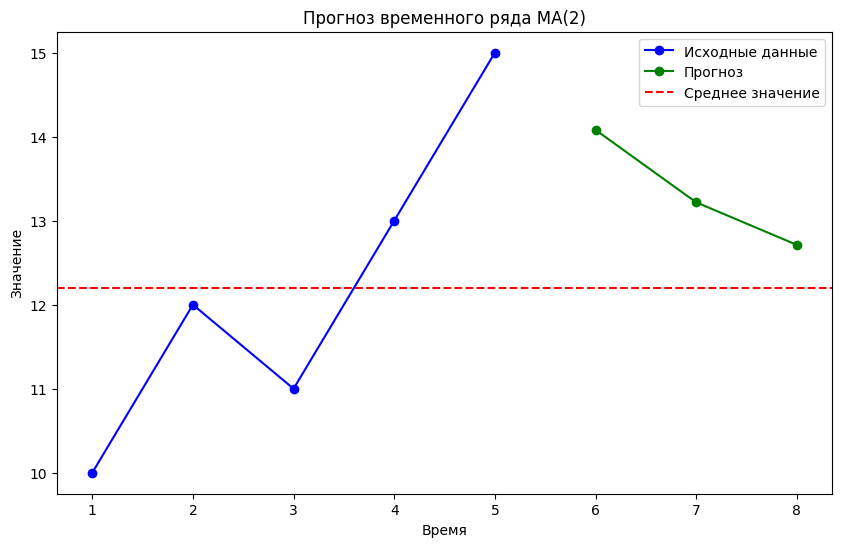

In [ ]:
import numpy as np

# Исходные данные
Y = np.array([10, 12, 11, 13, 15])  # Временной ряд
n = len(Y)
mu = np.mean(Y)  # Среднее значение

# Вычисляем начальные ошибки (e_t)
errors = Y - mu  # Остатки относительно среднего

# Функция для формирования матрицы A и вектора b
def compute_matrices(Y, errors, mu):
    n = len(Y)

    # Инициализация накопительных сумм
    sum_eps1_eps1 = 0
    sum_eps2_eps2 = 0
    sum_eps1_eps2 = 0
    sum_Y_eps1 = 0
    sum_Y_eps2 = 0

    # Считаем суммы, начиная с t=3
    for t in range(2, n):
        eps_t1 = errors[t - 1]
        eps_t2 = errors[t - 2]

        sum_eps1_eps1 += eps_t1**2
        sum_eps2_eps2 += eps_t2**2
        sum_eps1_eps2 += eps_t1 * eps_t2
        sum_Y_eps1 += (Y[t] - mu) * eps_t1
        sum_Y_eps2 += (Y[t] - mu) * eps_t2

    # Формируем матрицу A и вектор b
    A = np.array([
        [sum_eps1_eps1, sum_eps1_eps2],
        [sum_eps1_eps2, sum_eps2_eps2]
    ])
    b = np.array([sum_Y_eps1, sum_Y_eps2])

    return A, b

# Решение для коэффициентов θ1 и θ2
def solve_theta(A, b):
    theta = np.linalg.solve(A, b)  # Решаем систему A * theta = b
    return theta

# Основной алгоритм
A, b = compute_matrices(Y, errors, mu)
theta = solve_theta(A, b)

# Вывод результатов
theta_1, theta_2 = theta
print(f"Оцененные коэффициенты:")
print(f"θ1 = {theta_1:.4f}, θ2 = {theta_2:.4f}")

# Оценка дисперсии ошибок
residuals = []
for t in range(2, n):
    residual = Y[t] - mu - theta_1 * errors[t - 1] - theta_2 * errors[t - 2]
    residuals.append(residual)
sigma2 = np.var(residuals)
print(f"Оцененная дисперсия ошибок σ² = {sigma2:.4f}")

# Прогнозирование
def forecast(Y, mu, theta, steps=1):
    theta_1, theta_2 = theta
    predictions = []
    errors = list(Y - mu)  # Копируем начальные ошибки

    for _ in range(steps):
        # Прогнозируем следующее значение
        next_Y = mu + theta_1 * errors[-1] + theta_2 * errors[-2]
        predictions.append(next_Y)

        # Обновляем ошибки
        errors.append(next_Y - mu)

    return predictions

# Прогноз на 3 шага вперед
forecast_steps = 3
predictions = forecast(Y, mu, theta, steps=forecast_steps)
print(f"Прогноз на {forecast_steps} шагов вперед: {predictions}")

# Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), Y, label="Исходные данные", marker="o", color="blue")
plt.plot(range(n + 1, n + forecast_steps + 1), predictions, label="Прогноз", marker="o", color="green")
plt.axhline(mu, linestyle="--", color="red", label="Среднее значение")
plt.legend()
plt.title("Прогноз временного ряда MA(2)")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.show()

Среднее значение (mu) = 12.20

Ошибки ε_t для каждого периода:
ε_1 = -2.20
ε_2 = -0.20
ε_3 = -1.20
ε_4 = 0.80
ε_5 = 2.80

Оцененные коэффициенты модели MA(2): θ_1 = 0.1879, θ_2 = -0.1794

Оценка дисперсии ошибок σ^2 = 3.1100

Прогнозируемое значение Y_6 = 12.58


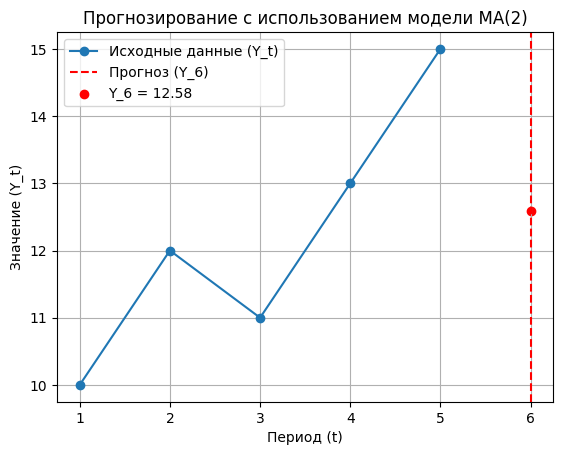

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные (Y_t)
Y = np.array([10, 12, 11, 13, 15])

# Шаг 1: Вычисление среднего значения μ
mu = np.mean(Y)
print(f"Среднее значение (mu) = {mu:.2f}")

# Шаг 2: Вычисление ошибок ε_t
epsilon = Y - mu
print("\nОшибки ε_t для каждого периода:")
for t in range(5):
    print(f"ε_{t+1} = {epsilon[t]:.2f}")

# Шаг 3: Построение модели MA(2) и нахождение коэффициентов θ_1 и θ_2
# Для этого необходимо решить систему уравнений методом максимального правдоподобия

# Определим функции для расчета коэффициентов
def compute_sums(Y, epsilon, mu):
    # Эти суммы будут использоваться для построения матрицы A и вектора b
    sum_epsilon_t_minus_1_2 = np.sum(epsilon[1:]**2)
    sum_epsilon_t_minus_2_2 = np.sum(epsilon[:-1]**2)
    sum_epsilon_t_minus_1_epsilon_t_minus_2 = np.sum(epsilon[1:] * epsilon[:-1])
    sum_Y_t_minus_mu_epsilon_t_minus_1 = np.sum((Y[2:] - mu) * epsilon[1:-1])
    sum_Y_t_minus_mu_epsilon_t_minus_2 = np.sum((Y[2:] - mu) * epsilon[:-2])

    return sum_epsilon_t_minus_1_2, sum_epsilon_t_minus_2_2, sum_epsilon_t_minus_1_epsilon_t_minus_2, sum_Y_t_minus_mu_epsilon_t_minus_1, sum_Y_t_minus_mu_epsilon_t_minus_2

# Вычисляем необходимые суммы
sum_epsilon_t_minus_1_2, sum_epsilon_t_minus_2_2, sum_epsilon_t_minus_1_epsilon_t_minus_2, sum_Y_t_minus_mu_epsilon_t_minus_1, sum_Y_t_minus_mu_epsilon_t_minus_2 = compute_sums(Y, epsilon, mu)

# Формируем матрицу A и вектор b для решения системы A * [θ_1, θ_2] = b
A = np.array([[sum_epsilon_t_minus_1_2, sum_epsilon_t_minus_1_epsilon_t_minus_2],
              [sum_epsilon_t_minus_1_epsilon_t_minus_2, sum_epsilon_t_minus_2_2]])
b = np.array([sum_Y_t_minus_mu_epsilon_t_minus_1, sum_Y_t_minus_mu_epsilon_t_minus_2])

# Решаем систему A * [θ_1, θ_2] = b
theta_1, theta_2 = np.linalg.solve(A, b)
print(f"\nОцененные коэффициенты модели MA(2): θ_1 = {theta_1:.4f}, θ_2 = {theta_2:.4f}")

# Шаг 4: Оценка дисперсии ошибок σ^2
# Для этого необходимо вычислить остатки (ошибки модели) для каждого t
errors = Y[2:] - mu - theta_1 * epsilon[1:-1] - theta_2 * epsilon[:-2]

# Оценка дисперсии ошибок σ^2
sigma2 = np.mean(errors**2)
print(f"\nОценка дисперсии ошибок σ^2 = {sigma2:.4f}")

# Шаг 5: Прогнозирование следующего значения Y_6
# Для прогноза используем ошибки ε_5 и ε_4
Y_6_forecast = mu + theta_1 * epsilon[4] + theta_2 * epsilon[3]
print(f"\nПрогнозируемое значение Y_6 = {Y_6_forecast:.2f}")

# Визуализация исходных данных и прогноза
plt.plot(range(1, 6), Y, label="Исходные данные (Y_t)", marker='o')
plt.axvline(x=6, color='r', linestyle='--', label="Прогноз (Y_6)")
plt.scatter(6, Y_6_forecast, color='r', label=f'Y_6 = {Y_6_forecast:.2f}')
plt.title('Прогнозирование с использованием модели MA(2)')
plt.xlabel('Период (t)')
plt.ylabel('Значение (Y_t)')
plt.legend()
plt.grid(True)
plt.show()